In [9]:
import torch
from network_profile.api import t_profile_net, t_profile_theory, t_profile_timings,_summarize_theory, _fix_timing_index, dataframe_readble
from network_profile.helpers import DEFAULT_LTYPE
from network_profile.computation_timing import *
from network_profile.plotting import *
from network_profile.memory_profile import log_memory

In [2]:
from  unet.unet_3d import RSUNet
inp = torch.randn(1,1,32,160,160).cuda()
model = RSUNet(12, 4).cuda()

In [19]:
a = t_profile_timings(model, inp)
b = t_profile_theory(model, inp, layer_type = DEFAULT_LTYPE)

In [4]:
data = t_profile_net(model, inp)

In [5]:
data["fwd_efficient"] =  data["fw_operation"] / data["fwd_node time"]

In [18]:
dataframe_readble(data).head()

,layer,fw_operation,bw_operation,input_size,output_size,MAC,fwd_node name,fwd_node time,fwd_kernel name,fwd_kernel time,bwd_node name,bwd_node time,bwd_kernel name,bwd_kernel time,fwd_efficient,bwd_efficient
Conv_0,Conv3d_0,491.52 M,983.04 M,"(1, 1, 32, 160, 160)","(1, 24, 32, 160, 160)",20.48 M,conv3d,2.23 m,conv3d,0.00223027,SlowConvDilated3DBackward,2.56 m,SlowConvDilated3DBackward,0.002558,220.39 G,384.30 G
Conv_1,Conv3d_1,12.74 G,25.48 G,"(1, 24, 32, 160, 160)","(1, 24, 32, 160, 160)",39.34 M,conv3d,13.47 m,conv3d,0.0134676,SlowConvDilated3DBackward,45.37 m,SlowConvDilated3DBackward,0.0453745,945.99 G,561.56 G
BatchNorm3d_0,BatchNorm3d_0,19.66 M,19.66 M,"(1, 24, 32, 160, 160)","(1, 24, 32, 160, 160)",39.32 M,batch_norm,1.30 m,batch_norm,0.00130458,NativeBatchNormBackward,1.47 m,NativeBatchNormBackward,0.00146837,15.07 G,13.39 G
Conv_2,Conv3d_2,12.74 G,25.48 G,"(1, 24, 32, 160, 160)","(1, 24, 32, 160, 160)",39.34 M,conv3d,13.47 m,conv3d,0.0134748,SlowConvDilated3DBackward,45.40 m,SlowConvDilated3DBackward,0.045396,945.48 G,561.29 G
BatchNorm3d_1,BatchNorm3d_1,19.66 M,19.66 M,"(1, 24, 32, 160, 160)","(1, 24, 32, 160, 160)",39.32 M,batch_norm,1.30 m,batch_norm,0.00130457,NativeBatchNormBackward,1.45 m,NativeBatchNormBackward,0.00145,15.07 G,13.56 G


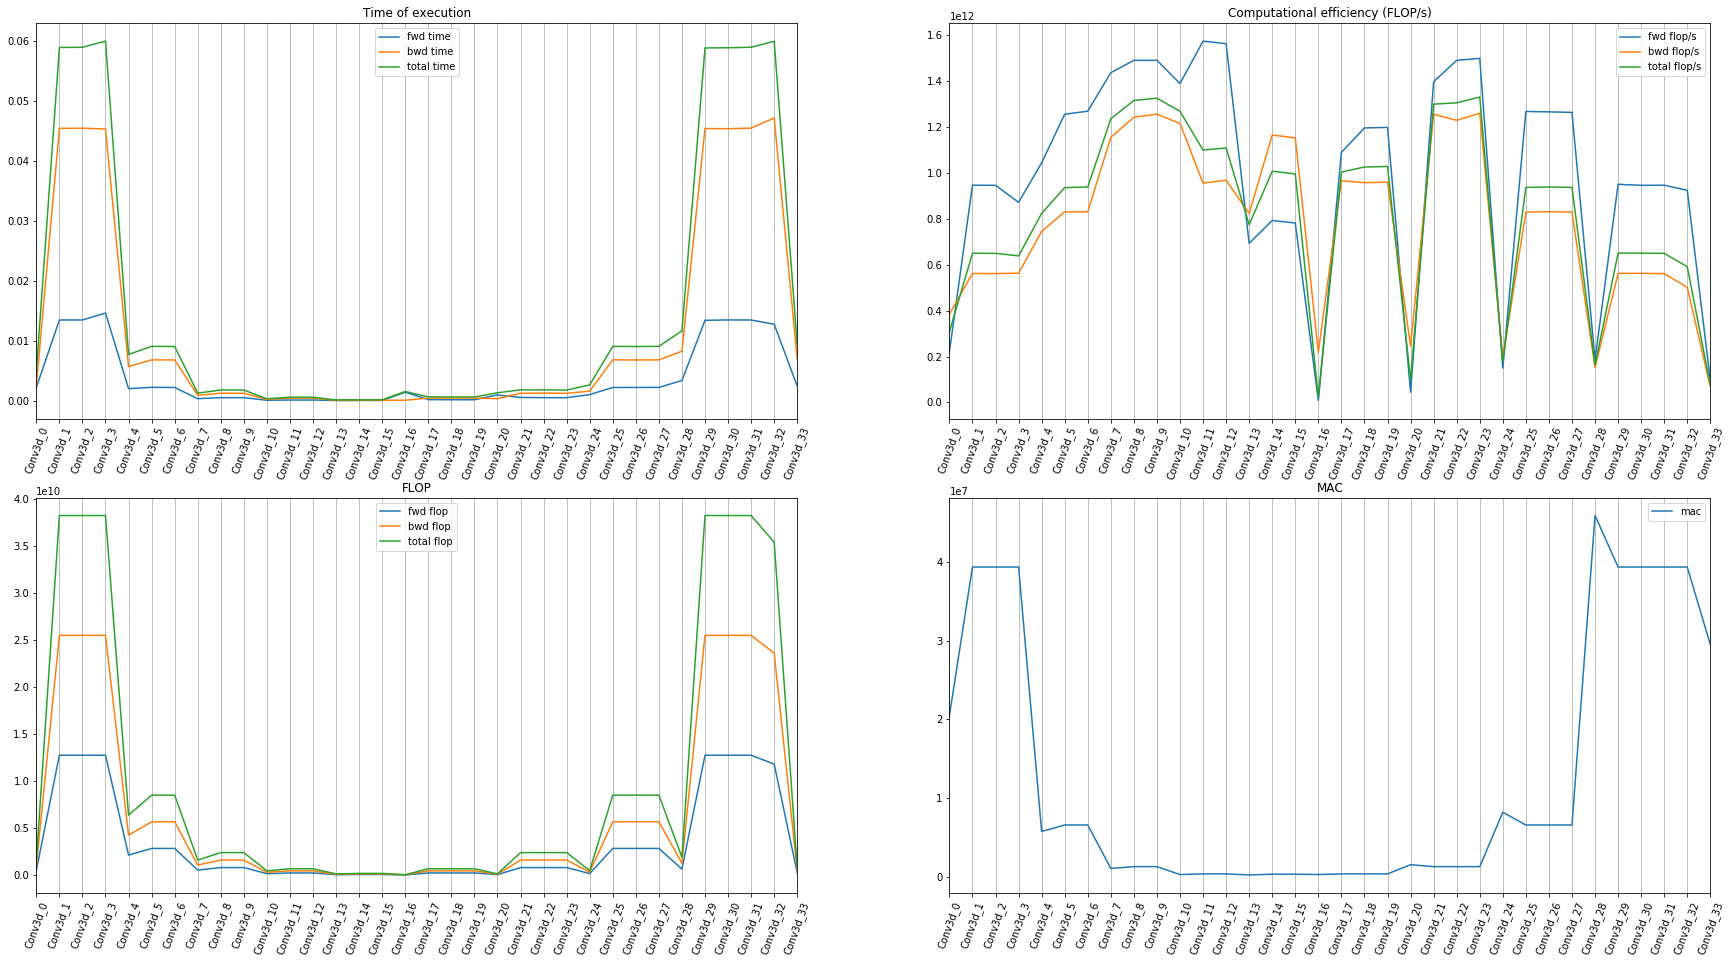

In [8]:
data_conv = data[data["fwd_node name"] == "conv3d"]
plot_time_FLOPs_FLOP_MAC(data_conv)

In [12]:
memory = log_memory(model, inp)

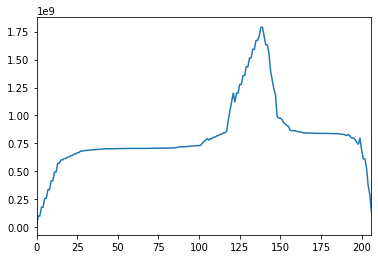

In [14]:
memory['mem_all'].plot()